In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Linear classification

Recall the general formula of a line in $\mathbb{R}^2$: $y = mx + b$, or $$0 = mx + ny + b$$

In machine learning we like to use the more general $x_1$ and $x_2$ for variables rather than x and y

We can express our hypothesis function, in this case a line, as $$h(x) = w_0 + w_1x_1 + w_2x_2$$

By introducing a dummy variable $x_0 = 1$, we can write $$h(x) = w^Tx$$

Logistic regression is one of the most commonly used and interpretable classification methods, here we will introduce it's mathematical form and show how it is equivalent to a neural network architecture called a perceptron

Each 'node' in a neural 'feeds-forward' its output to another node, where the input is transformed by an **activation function**.  One such function is the **sigmoid function** $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Text(0.5,1,'Sigmoid curve')

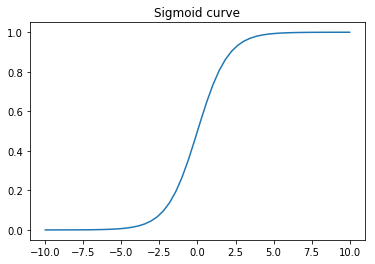

In [2]:
z = np.linspace(-10, 10, 50)
def sigmoid(z):
    return 1/(1 + np.exp(-z))

plt.plot(z, sigmoid(z));
plt.title('Sigmoid curve')

And so our model becomes $$\hat{p} = \sigma(h(x))$$ $$\hat{p} = \sigma(w^Tx)$$ $$\hat{p} = \frac{1}{1 + e^{-w^{T}x}}$$

It is easy to show that a simple single-layer perceptron is equivalent to logistic regression

In [3]:
# Neuron/logistic regression classifier code
N = 100
D = 2

X = np.random.randn(N,D)
dummy = np.array([[1] * N]).T
PHI = np.concatenate((dummy, X), axis = 1)

w = np.random.randn(D + 1)

z = PHI.dot(w)

p_hat = sigmoid(z)

If we check the contents of p_hat, we see the model outputs a real number between 0 and 1, hence why it is called a regression.  But how should these numbers be interpreted if our target variable is binary- 0 or 1?  Where 0 indicates the absence and 1 the presence of something of interest in whatever our classification problem is.  This means that our target follows a Bernoulli distribution, where the parameter p(probability of success) is unknown $$y \sim B(p)$$

Let's review the relationship between odds and probability to better understand the output of our logistic regression model - We can write the probability of a particular event, E, as $$P(E) = \frac{\mid E\mid}{\mid S\mid}$$ where S is the set of all possible outcomes.  Now let p = P(E) for ease of notation and we see that the odds of E are related to p as follows: $$odds(E) = \frac{p}{1 - p}$$

The Bernoulli perameter p is related to the odds by the **logit** function, sometimes just called the log-odds.  $$logit(p) = ln \frac{p}{1 - p}$$

/Users/richardmason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/richardmason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


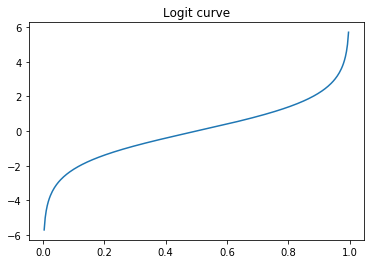

In [4]:
# the logit function
p = np.linspace(0, 1, 300)
def logit(p):
    return np.log(p/(1-p))

plt.plot(p, logit(p))
plt.title('Logit curve');

Recall that in logistic regression, p is unknown, so rather than a function which takes p as an input, we need a function that returns p as an output.  We can find such a function by taking the inverse of the logit.  letting $$h = ln\frac{p}{1 - p}$$ and solving for p, we obtain: $$p = \frac{1}{1 + e^{-h}}$$

and since $h = logit(p)$ the hypothesis hyperplane $h(x) = w^Tx$ aproximates the logit function as a linear combination of the features x, and so we arrive at our model: $$\hat{p} = \frac{1}{1 + e^{-w^Tx}}$$

### Section about logit being in the form of a hyperplane, and how therefore our hypothesis is actually a good estimator for the logit

As with any machine learning model, we need a cost function to optimize.  This function should return a total error of 0 when all of our predictions are perfectly correct, it should get larger as our predictions get further away from the true values, and it should be relatively easy to optimize.  Such a function is the **Categorical Cross-Entropy** : $$J(w_0,\ldots,w_D) = -\sum\limits_{i=1}^{N} y_iln\hat{p}_i + (1-y_i)ln(1-\hat{p}_i)$$

The likelihood function for a logistic regression on a data set with $N$ training samples, $(x_1, y_1),\ldots,(x_N,y_N)$ where for each sample $y_i \sim B(p_i)$ with unknown parameter $p_i$ is given by: $$\mathcal{L}(y|p) =\prod\limits_{i=1}^{N} p_i^{y_i}(1-p_i)^{1-y_i}$$

after a derivation we find that the log-likelihood, $ln\mathcal{L} = -J$ and therefore see that minimizing the cross-entropy error yields the **Maximum Likelihood Estimate** for the model parameters

Since itt's not possible to set the cross-entropy derivative equal to zero and solve for the roots, we will employ **Gradient Descent** to optimize the model weights.  Recall our logistic regression model $$\hat{p} = \frac{1}{1 + e^{-h}}$$ where our hypothesis $$h = -w^Tx$$

we find that $$\frac{\partial{J}}{\partial{w}} = X^T(\hat{p} - y)$$ where $X$ is the $N x (D+1)$ matrix containing each of the $N$ training examples across the $D+1$ features, $\hat{p}$ is the $Nx1$ vector containing the predicted $p$ parameter value for each training example, and $y$ is the $Nx1$ vector containing the label in each training example.  The equation for updating the weights via Gradient Descent is as follows: $$w' = w - r_L\frac{\partial{}}{\partial{w}}J(w)$$ or $$w' = w - r_LX^T(\hat{p} - y)$$

### optimizing cross-entropy objective function via gradient descent(code)

In [5]:
N = 100
D = 2

In [6]:
X = np.random.randn(N,D)

In [7]:
X[:(N//2), 0] += 2
X[:(N//2), 1] += 1
X[(N//2):, 0] -= 2
X[(N//2):, 1] -= 1
X = np.column_stack((np.array([[1] * N]).T, X))

y = np.array([0] * (N//2) + [1] * (N//2))

In [8]:
X

array([[ 1.00000000e+00,  1.54639775e+00, -3.93128329e-01],
       [ 1.00000000e+00,  2.10648420e+00, -3.03496973e-01],
       [ 1.00000000e+00,  3.48233081e+00,  4.33631349e-01],
       [ 1.00000000e+00,  3.08879701e+00,  9.45071451e-01],
       [ 1.00000000e+00,  2.35533219e+00,  2.51302110e+00],
       [ 1.00000000e+00,  2.52563114e+00,  1.16888794e+00],
       [ 1.00000000e+00,  1.26306825e+00,  1.68416096e+00],
       [ 1.00000000e+00,  1.50269061e+00,  5.53634399e-02],
       [ 1.00000000e+00,  1.41659382e+00,  1.71811431e+00],
       [ 1.00000000e+00,  1.62170814e+00,  1.50433565e+00],
       [ 1.00000000e+00,  2.57405819e+00,  1.05205828e+00],
       [ 1.00000000e+00,  1.53365003e+00,  1.41330027e+00],
       [ 1.00000000e+00,  1.95104837e+00,  2.71227399e-01],
       [ 1.00000000e+00,  2.06163284e+00,  2.06987307e+00],
       [ 1.00000000e+00,  1.23393672e+00, -2.03363758e-01],
       [ 1.00000000e+00,  1.25482724e+00,  9.89800564e-01],
       [ 1.00000000e+00,  2.38343202e+00

In [9]:
def cross_entropy(y,p):
    return -np.sum(y * np.log(p) +
                  (1-y) * np.log(1-p))

In [10]:
w = np.random.randn(D+1)/np.sqrt(D+1)
r = 0.01 # learning rate

In [11]:
J = []

In [12]:
for i in range(200):
    h = X.dot(w)
    p = sigmoid(h)
    J.append(cross_entropy(y,p))
    w -= r * X.T.dot(p-y)

In [13]:
h = X.dot(w)
p = sigmoid(h)

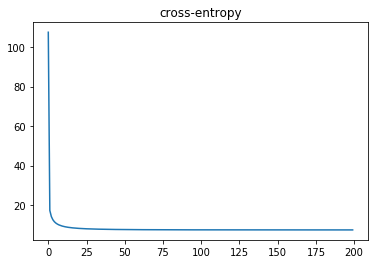

In [14]:
plt.plot(J)
plt.title('cross-entropy')
plt.show()

In [15]:
disc_x1 = np.linspace(-4, 4, 50)
disc_x2 = -(w[0]/w[2]) - (w[1]/w[2]) * disc_x1

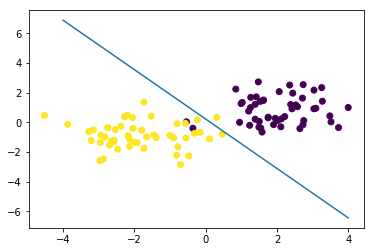

In [16]:
plt.scatter(X[:,1], X[:,2], c = y)
plt.plot(disc_x1, disc_x2)
plt.show()

### L2-regularization

Now consider the case where we have data points $(x_1, y_1),\ldots,(x_N,y_N)$ and we fit a logistic regression model using two features.  If our decision boundary is given by the line $x_2 = -x_1$ then our hypothesis line is of the form: $$h(x) = 0 + kx_1 + kx_2$$ and since any $k\in\mathbb{R}^2$ will give us the same decision boundary, we should wonder if our choice of $k$ matters, or if there is a "best" value of $k$.  The following code will consider the impact of $k$ on the objective cross-entropy function

/Users/richardmason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/richardmason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


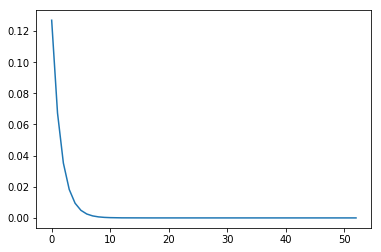

In [17]:
X = np.array([1,1,1])
J = []

for k in np.linspace(1, 200, 600):
    w = np.array([0, k, k])
    p = sigmoid(w.dot(X))
    J.append(cross_entropy(1,p))

plt.plot(J)
plt.show()

Just as with linear regression, we can add a term to the cross-entropy objective function that minimizes the influence of large coefficient weights.  $$J = -\sum\limits_{i=1}^{N} [y_iln\hat{p}_i + (1-y_i)ln(1-\hat{p}_i] + \frac{\lambda}{2}\Vert w\Vert^2_2$$

We already know that $$\mathcal{L} = e^{-J}$$ and so $$\mathcal{L} = (\prod\limits_{i=1}^{N} \hat{p}_i^{y_i}(1-\hat{p}_i)^{1-y_i})(\prod\limits_{j=0}^{D}e^{-\frac{\lambda}{2}w_j^2}$$

We can recognize the left factor of the above equation as the probability $P(y=1|X,w)$ and the factor on the right as a Gaussian distribution centered around $w=0$ with a variance of $\frac{1}{\lambda}$ which is the probability distribution of $w$, we can therefore make the following substitutions: $$\mathcal{L} = P(y|X,w)P(w)$$ and applying Baye's Theorem: $$P(w|X,y) \propto P(y|X,w)P(w)$$

So we can see that by minimizing the objective function, $J$ we are maximizing $P(w|X,y=1)$ or the posterior distribution of $w$

The distribution $P(w)$ is the prior distribution of w with mean 0 and variance $\frac{1}{\lambda}$ Because this distribution represents our prior beliefs about $w$ we are asserting that the weights are near 0.  Observe the larger the value of $\lambda$, the smaller the variance$(\frac{1}{\lambda})$ of $P(w)$ and the more concentrated the distribution becomes around 0.  Therefore, larger values of $\lambda$ lead to smaller weights

We will need to use gradient descent to minimize the objective function, and because the derivative is a linear operator, the derivative we need will be the sum of the derivative we already calculated for the objective function, and that of $\frac{\partial{}}{\partial{w}}(\frac{\lambda}{2}w^Tw) = \lambda w$ so we have $$\frac{\partial{J}}{\partial{w}} = X^T(\hat{p} - y) + \lambda w$$ as our equation for optimizing **cross-entropy with L2 penalty via gradient descent**

### L-2 regularization(code)

In [18]:
N = 100
D = 2

In [19]:
X = np.random.randn(N,D)
X[:(N//2), 0] += 2
X[:(N//2), 1] += 2
X[(N//2):, 0] -= 2
X[(N//2):, 1] -= 2
X[(N-5):, 0] += 6
X[(N-5):, 1] += 4
X = np.column_stack((np.array([[1] * N]).T, X))

In [20]:
y = np.array([0] * (N//2) + [1] * (N//2))

In [21]:
def classification_rate(y,p):
    return np.mean(y == np.round(p))

In [22]:
w = np.random.randn(D+1)/np.sqrt(D+1)
r = 0.01
l2 = 1000
J = []

In [23]:
for i in range(200):
    h = X.dot(w)
    p = sigmoid(h)
    J.append(cross_entropy(y,p))
    w -= r*(X.T.dot(p-y) + l2 * w)

/Users/richardmason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/richardmason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/richardmason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/richardmason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [24]:
h = X.dot(w)
p = sigmoid(h)

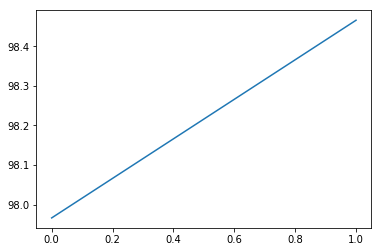

In [25]:
plt.plot(J)
plt.show()

In [26]:
disc_x1 = np.linspace(-6, 6, 50)
disc_x2 = -(w[0]/w[2]) - (w[1]/w[2]) * disc_x1

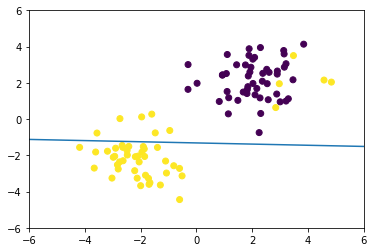

In [27]:
plt.scatter(X[:,1], X[:,2], c = y)
plt.plot(disc_x1, disc_x2)
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.show()

In [28]:
print("Classification Rate: {}".format(classification_rate(y,p)))

Classification Rate: 0.11


### L1-regularization theory + code

Similarly, we can add the $L^1$ norm of the vector $w$ to the cross-entropy objective function as follows: $$J(w) = -\sum\limits_{i=1}^{N} y_iln\hat{p}_i + (1 - y_i)ln(1 - \hat{p}_i) + \lambda \sum\limits_{j=0}^{D} \Vert w_j\Vert$$

As with Ridge regularization, we know that minimizing the error is equivalent to maximimizing the posterior distribution of w, where $$\mathcal{L} = (\prod\limits_{i=1}^{N} \hat{p}_i^{y_i}(1-\hat{p}_i)^{1-y_i})(\prod\limits_{j=0}^{D}e^{-\lambda |w_j|}$$, the only difference being the value of the penalty term added.  In the case here of $L^1$ regularization, the prior distribution of $w$ is Laplacian instead of Gaussian, which will even more strongly encourage weights to be zero

We come to the formula for L1-regularization with gradient descent: $$\frac{\partial{J}}{\partial{w}} = X^T(\hat{p} - y) + \lambda sign(w)$$

In [29]:
N = 100
D = 100

In [30]:
X = np.random.randn(N,D)

In [31]:
X = np.column_stack((np.array([[1] * N]).T, X))
w_true = np.array([0.5, 2.4, -1.7] + [0] * (D-2))
y = sigmoid(X.dot(w_true) + np.random.randn(N))

In [32]:
w = np.random.randn(D + 1)/np.sqrt(D + 1)

In [33]:
r = 0.0001
l_1 = 10
J = []

In [37]:
def cross_entropy_regular(y, p, w, regularization = l_1):
    return -np.sum(y * np.log(p) +
                          (1-y) * np.log(1 - p) +
                    l_1 * np.sum(np.abs(w)))
    

In [39]:
for i in range(1000):
    h = X.dot(w)
    p = sigmoid(h)
    J.append(cross_entropy_regular(y, p, w, l_1))
    w -= r * (X.T.dot(p-y) + l_1 * np.sign(w))

In [40]:
h = X.dot(w)
p = sigmoid(h)

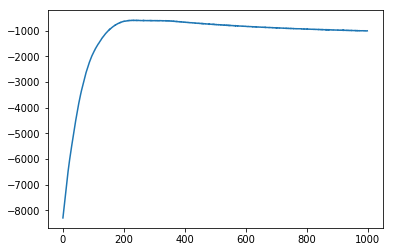

In [41]:
plt.plot(J)
plt.show()

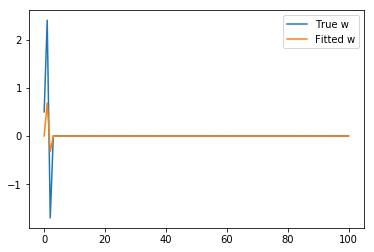

In [42]:
plt.plot(w_true, label = "True w")
plt.plot(w, label = "Fitted w")
plt.legend()
plt.show()

### ElasticNet regression

We can also combine the Ridge($L^2$) and LASSO($L^1$), which is called **Elastic Net** regularization, and is just the $L^1$ and $L^2$ penalties added to the objective function: $$J(w) = -\sum\limits_{i=1}^{N} y_iln\hat(p)_i + (1-y_i)ln(1-\hat{p}_i) + \frac{\lambda}{2}\|w\|^2 + \lambda\lvert w\rvert$$

Just as before, we find the derivatives of the individual components and add them together, again remembering that the derivative is a linear operator, and employ **Gradient Descent**: 
$$\frac{\partial{J}}{\partial{w}} = X^T(\hat{p}-y) + \lambda_{2}w + \lambda_{1}sign(w)$$

#### Multinomial Logistic Regression and the "One vs. All" method

Up until know our classification problem has only involved 2 classes, 0 or 1.  But in real world problems we will often have more than two classes, which will require several modifications to the binary classification model.

We know that since the **Logistic Regression** algorithm is a linear classifier, it defines a linear(non-curving) discrimination boundary, and so the feature space is divided into two regions, which leads to binary classification.  How do we adapt this linear method to problems with arbitrarily many classes?
Let us first consider the simplest non-binary case, in which there are three classes.  To begin, let us consider the following figure: 

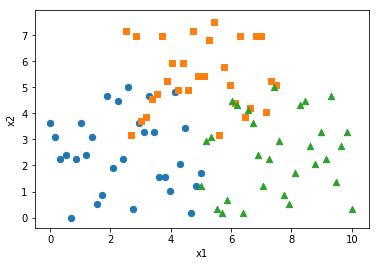

In [22]:
x = np.linspace(0, 5, 30)
plt.scatter(x, np.random.choice(x, size = 30), s = 40)
x = np.linspace(2.5, 7.5, 30)
plt.scatter(x, np.random.choice(x, size = 30), marker = 's', s = 40)
x = np.linspace(5, 10, 30)
plt.scatter(x, np.random.choice(x, size = 30)-5, s = 40, marker = '^')
plt.xlabel('x1')
plt.ylabel('x2');


Regardless of how many classes there are, the problem can be coerced into a binary classification by deciding upon a class of interest, and then using Logistic Regression to determine the probability that an observation belongs to the class of interest.  Using the example above, we can visualize the decision boundary for each case.

Text(0,0.5,'x2')

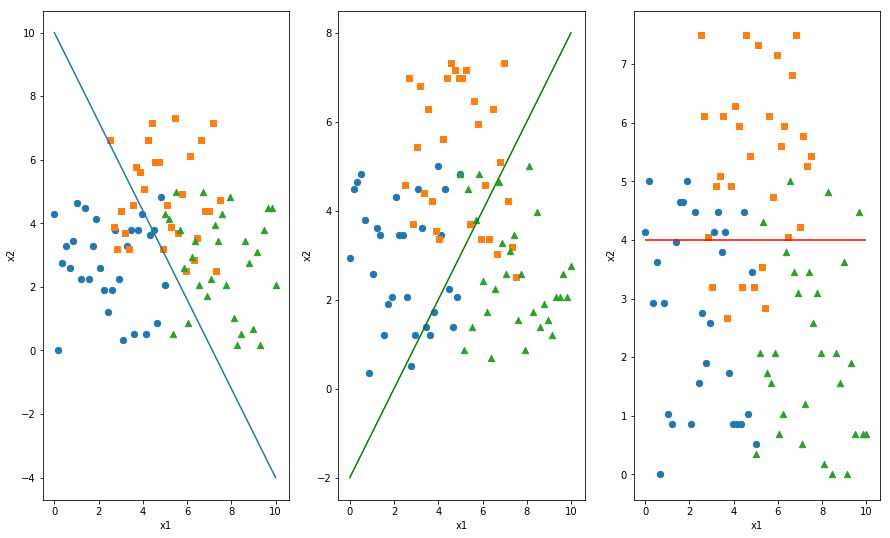

In [45]:
plt.figure(figsize = (15, 9))
plt.subplot(1,3,1)
x = np.linspace(0, 5, 30)
plt.scatter(x, np.random.choice(x, size = 30), s = 40)
x = np.linspace(2.5, 7.5, 30)
plt.scatter(x, np.random.choice(x, size = 30), marker = 's', s = 40)
x = np.linspace(5, 10, 30)
plt.scatter(x, np.random.choice(x, size = 30)-5, s = 40, marker = '^')
x = np.linspace(0, 10)
y_1 = -(7/5)*x + 10
plt.plot(x, y_1)
plt.xlabel('x1')
plt.ylabel('x2')


plt.subplot(1,3,2)
x = np.linspace(0, 5, 30)
plt.scatter(x, np.random.choice(x, size = 30), s = 40)
x = np.linspace(2.5, 7.5, 30)
plt.scatter(x, np.random.choice(x, size = 30), marker = 's', s = 40)
x = np.linspace(5, 10, 30)
plt.scatter(x, np.random.choice(x, size = 30)-5, s = 40, marker = '^')
x = np.linspace(0, 10)
y_1 = -(7/5)*x + 10
y_2 = x - 2
plt.plot(x, y_2, c = 'g')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1,3,3)
x = np.linspace(0, 5, 30)
plt.scatter(x, np.random.choice(x, size = 30), s = 40)
x = np.linspace(2.5, 7.5, 30)
plt.scatter(x, np.random.choice(x, size = 30), marker = 's', s = 40)
x = np.linspace(5, 10, 30)
plt.scatter(x, np.random.choice(x, size = 30)-5, s = 40, marker = '^')
x = np.linspace(0, 10)
y_1 = -(7/5)*x + 10
y_2 = x - 2
y_3 = 4
plt.hlines(4, xmin = min(x), xmax = max(x), color = 'r')
plt.xlabel('x1')
plt.ylabel('x2')

Each of these different models will yield the probability that a given observation is the class of interest, we can then combine the output of all 3 models.  The output of this combined model will be a vector containing the probability for each label.
In general, if there are k classes, we will need to fit k **Logistic Regression** models to calculate the probability of an observation being in each class. Rather than actually fitting k separate models, it would be much more efficient to find a way of simultaneously defining these k decision boundaries and calculating these k probabilities and combining them into the output of a single model.  We will explore how this is done in the following sections.

For